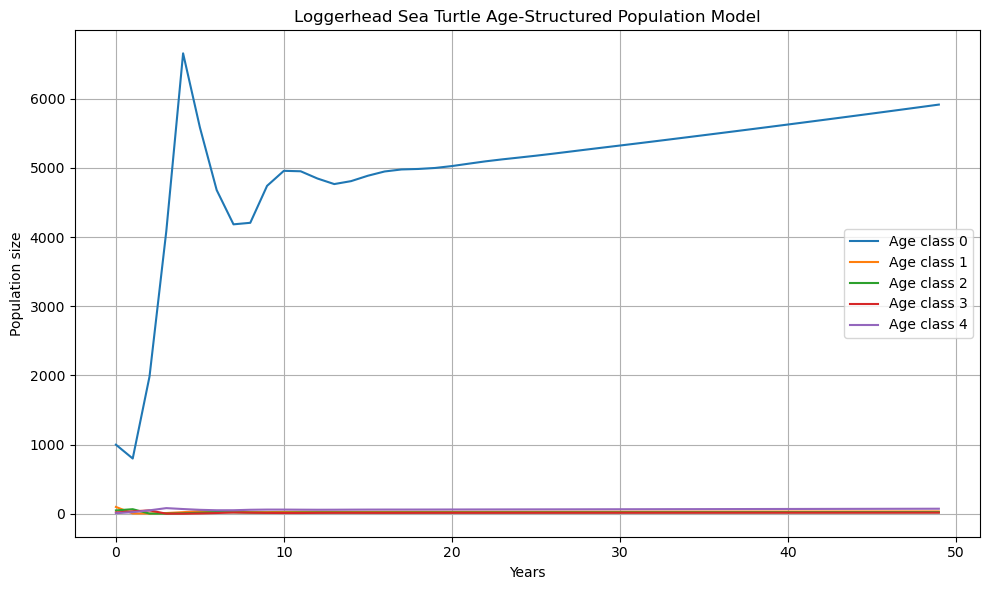

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
n_ages = 5  # number of age classes

# Annual survival rates between stages (from literature like Crouse et al., 1987)
survival = np.array([
    0.006,   # Age 0 -> Age 1 (Hatchling to Oceanic Juvenile)
    0.675,   # Age 1 -> Age 2 (Oceanic to Neritic Juvenile)
    0.742,   # Age 2 -> Age 3 (Neritic to Subadult)
    0.836,   # Age 3 -> Age 4 (Subadult to Adult)
    0.809    # Age 4 -> Age 4+ (Adult to Adult)
])

# Fecundity: Only adults reproduce, assumed per adult female per year
# Note: This is a simplification — real fecundity depends on clutch size, frequency, and sex ratio.
fecundity = 80.0  # number of female hatchlings per adult female per year

# Leslie matrix construction
L = np.zeros((n_ages, n_ages))
L[0, -1] = fecundity                  # Adults produce hatchlings
for i in range(1, n_ages):
    L[i, i-1] = survival[i-1]         # Survival from age i-1 to i
L[-1, -1] = survival[-1]              # Adults remain adults

# Initial population (arbitrary numbers for illustration)
population = np.array([1000, 100, 50, 20, 10])  # age classes 0 to 4+

# Time simulation
years = 50
history = np.zeros((years, n_ages))
for t in range(years):
    history[t] = population
    population = L @ population  # matrix multiplication

# Plotting
plt.figure(figsize=(10, 6))
for i in range(n_ages):
    plt.plot(history[:, i], label=f'Age class {i}')
plt.xlabel('Years')
plt.ylabel('Population size')
plt.title('Loggerhead Sea Turtle Age-Structured Population Model')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

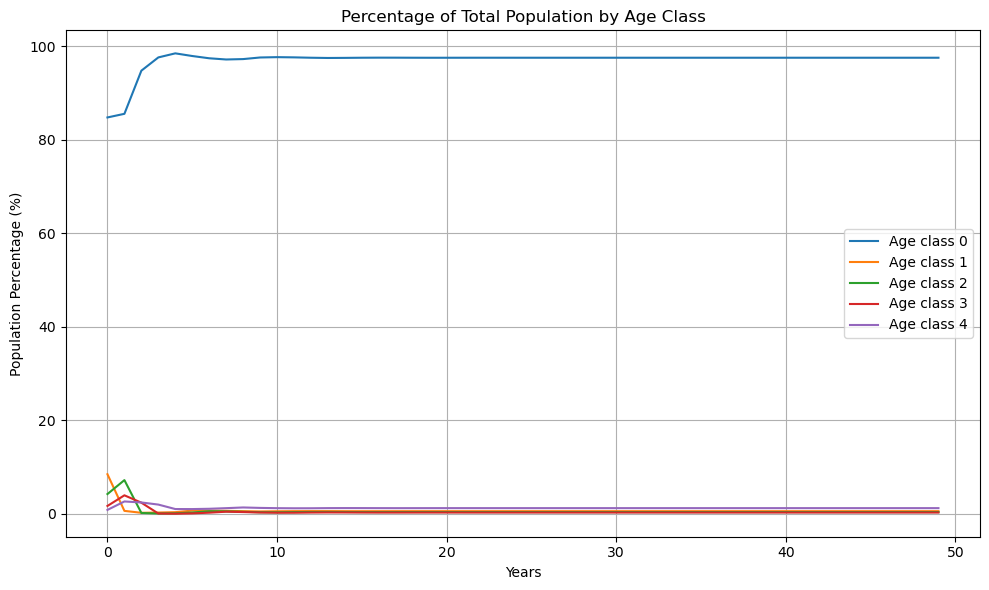

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
n_ages = 5

# Survival rates
survival = np.array([
    0.006,   # Age 0 -> 1
    0.675,   # Age 1 -> 2
    0.742,   # Age 2 -> 3
    0.836,   # Age 3 -> 4
    0.809    # Age 4 -> 4
])

# Fecundity (number of hatchlings per adult per year)
fecundity = 80.0

# Leslie matrix
L = np.zeros((n_ages, n_ages))
L[0, -1] = fecundity
for i in range(1, n_ages):
    L[i, i-1] = survival[i-1]
L[-1, -1] = survival[-1]

# Initial population
population = np.array([1000, 100, 50, 20, 10])

# Time simulation
years = 50
history = np.zeros((years, n_ages))

for t in range(years):
    history[t] = population
    population = L @ population

# Compute percentages
total_population = history.sum(axis=1, keepdims=True)
percentages = 100 * history / total_population

# Plotting
plt.figure(figsize=(10, 6))
for i in range(n_ages):
    plt.plot(percentages[:, i], label=f'Age class {i}')
plt.xlabel('Years')
plt.ylabel('Population Percentage (%)')
plt.title('Percentage of Total Population by Age Class')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

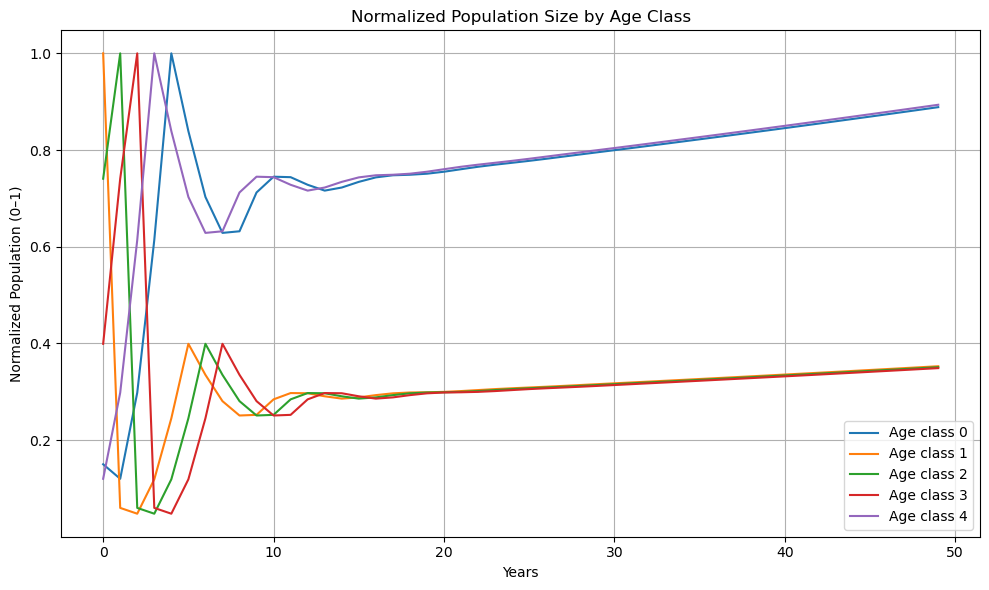

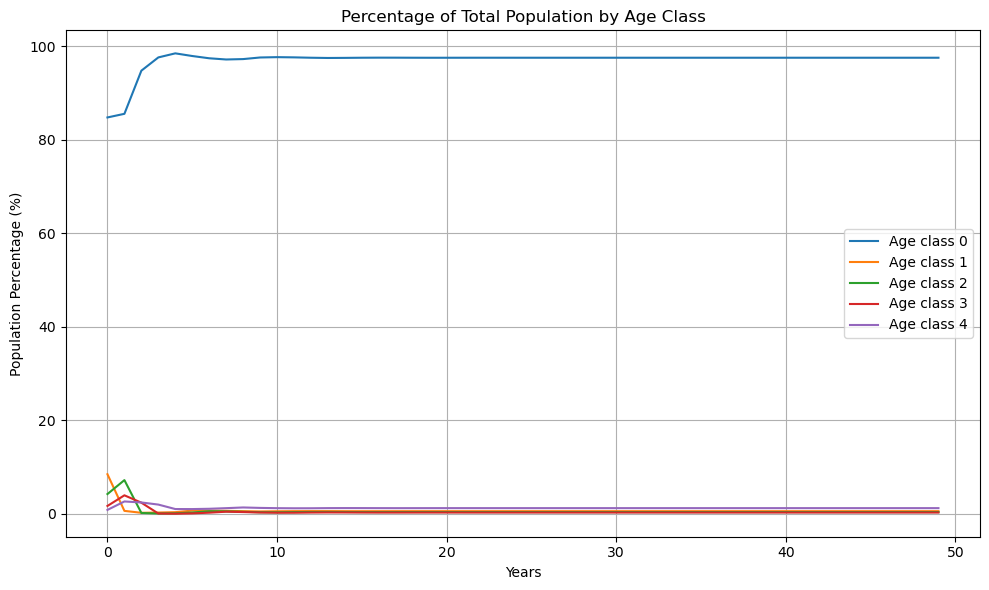

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
n_ages = 5

# Survival rates
survival = np.array([
    0.006,   # Age 0 -> 1
    0.675,   # Age 1 -> 2
    0.742,   # Age 2 -> 3
    0.836,   # Age 3 -> 4
    0.809    # Age 4 -> 4
])

# Fecundity (number of hatchlings per adult per year)
fecundity = 80.0

# Leslie matrix
L = np.zeros((n_ages, n_ages))
L[0, -1] = fecundity
for i in range(1, n_ages):
    L[i, i-1] = survival[i-1]
L[-1, -1] = survival[-1]

# Initial population
population = np.array([1000, 100, 50, 20, 10])

# Time simulation
years = 50
history = np.zeros((years, n_ages))

for t in range(years):
    history[t] = population
    population = L @ population

# === Plot 1: Normalized population sizes ===
normalized_history = history / history.max(axis=0)  # normalize each age class to its own max

plt.figure(figsize=(10, 6))
for i in range(n_ages):
    plt.plot(normalized_history[:, i], label=f'Age class {i}')
plt.xlabel('Years')
plt.ylabel('Normalized Population (0–1)')
plt.title('Normalized Population Size by Age Class')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === Plot 2: Percent of total population ===
total_population = history.sum(axis=1, keepdims=True)
percentages = 100 * history / total_population

plt.figure(figsize=(10, 6))
for i in range(n_ages):
    plt.plot(percentages[:, i], label=f'Age class {i}')
plt.xlabel('Years')
plt.ylabel('Population Percentage (%)')
plt.title('Percentage of Total Population by Age Class')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

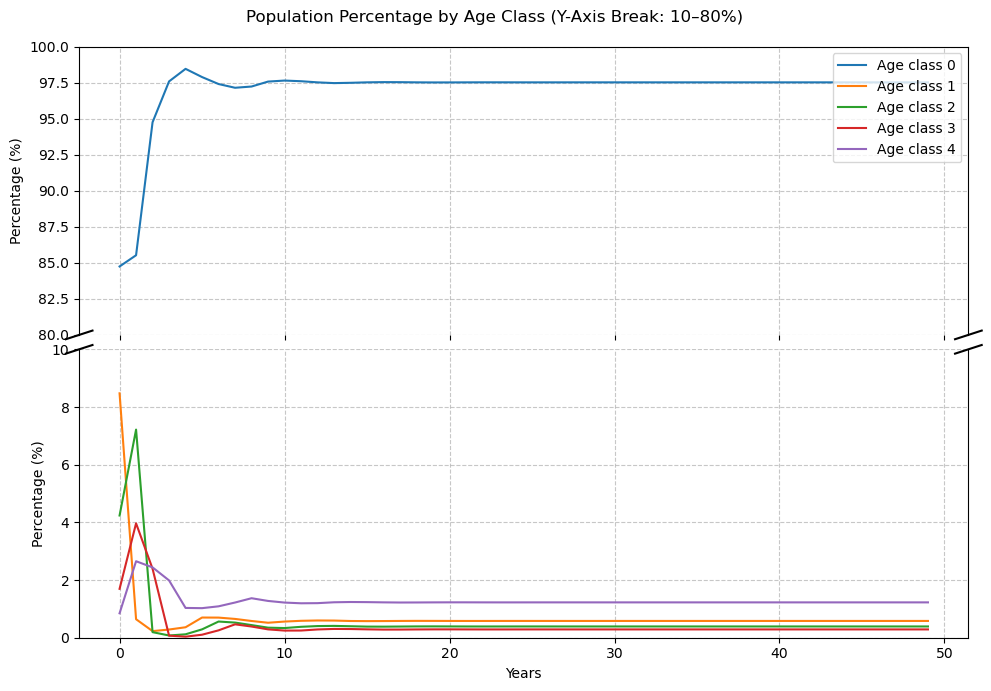

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# ==== Parameters ====
n_ages = 5
survival = np.array([0.006, 0.675, 0.742, 0.836, 0.809])
fecundity = 80.0
years = 50

# ==== Build Leslie Matrix ====
L = np.zeros((n_ages, n_ages))
L[0, -1] = fecundity
for i in range(1, n_ages):
    L[i, i - 1] = survival[i - 1]
L[-1, -1] = survival[-1]

# ==== Simulate Population Dynamics ====
population = np.array([1000, 100, 50, 20, 10])
history = np.zeros((years, n_ages))
for t in range(years):
    history[t] = population
    population = L @ population

# ==== Calculate Percentages ====
total_population = history.sum(axis=1, keepdims=True)
percentages = 100 * history / total_population  # shape: (years, n_ages)

# ==== Plot with Y-axis Break between 10% and 80% ====
fig, (ax_top, ax_bottom) = plt.subplots(
    2, 1, sharex=True, figsize=(10, 7), gridspec_kw={'height_ratios': [1, 1]}
)

# Set Y-axis limits
top_ylim = (80, 100)
bottom_ylim = (0, 10)

# Plot on both axes
for i in range(n_ages):
    ax_top.plot(percentages[:, i], label=f'Age class {i}')
    ax_bottom.plot(percentages[:, i], label=f'Age class {i}')

# Set Y-axis limits for the break
ax_top.set_ylim(top_ylim)
ax_bottom.set_ylim(bottom_ylim)

# Add grid lines to both subplots
ax_top.grid(True, linestyle='--', alpha=0.7)
ax_bottom.grid(True, linestyle='--', alpha=0.7)

# Hide the spines between the axes
ax_top.spines['bottom'].set_visible(False)
ax_bottom.spines['top'].set_visible(False)
ax_top.tick_params(labeltop=False)
ax_bottom.xaxis.tick_bottom()

# Diagonal break marks
d = .015  # size of diagonal lines
kwargs = dict(transform=ax_top.transAxes, color='k', clip_on=False)
ax_top.plot((-d, +d), (-d, +d), **kwargs)
ax_top.plot((1 - d, 1 + d), (-d, +d), **kwargs)

kwargs.update(transform=ax_bottom.transAxes)
ax_bottom.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax_bottom.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

# Labels and title
ax_bottom.set_xlabel('Years')
ax_top.set_ylabel('Percentage (%)')
ax_bottom.set_ylabel('Percentage (%)')
fig.suptitle('Population Percentage by Age Class (Y-Axis Break: 10–80%)')
ax_top.legend(loc='upper right')

plt.tight_layout()
plt.subplots_adjust(hspace=0.05)
plt.show()

- In the 50-year simulation, the youngest age class (Age 0) started with an initial population of 1000 individuals. The population in this youngest class fluctuated initially due to the high birth rate. Older age classes experienced higher mortality because survival rates decrease with age. By the end of the 50 years, the population approached a stable age distribution, where the proportion of individuals in each age class remained nearly constant year after year.

- The transient phase lasted about the first 10 to 20 years. During this time, the population structure shifted noticeably as the initial age distribution adjusted to the inherent growth and survival rates defined by the Leslie matrix.

- After the transient phase, the model entered a stable phase (around 20 to 30 years), where the proportions of individuals in each age class became constant over time, even if the total population size was growing or declining exponentially.

- Difference between the Population Size plot and the Population Percentage plot: The normalized population size plot shows how each age class’s population changes over time relative to its own maximum value. It highlights within-class dynamics, making it easier to compare growth or decline trends across different age classes. In contrast, the population percentage plot shows the proportion each age class contributes to the total population at each point in time. This helps visualize the overall population structure and how it shifts toward a stable age distribution over the 50 years.